<a href="https://colab.research.google.com/github/braingeneers/experiment/blob/master/ingest/view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Demonstrate loading and viewing data from the 11-12-2018 MEA organoid experiments at UCSF. Click on the 'Open in Colab' button above to open, run, and edit in Google's free Jupyter notebook server. Read, comment and ask questions via [this github issue](https://github.com/braingeneers/experiment/issues/1).

Notes from the 4 separate experiments performed:

_1 & 2: Baseline recordings made w/o organoid but with media (brain serum). Then organoid added and recordings made with various filter settings on the MEA board._

_3 & 4: Recordings start with organoid in place. Then KCl was added via pipette. Recording continued through addition and after._

_All: 16 outputs, 4 of which were not touching_

See the [ingest notebook](https://github.com/braingeneers/experiment/blob/master/ingest/ingest.ipynb) for details on how the raw files were imported as well as a full listing of the wrangled urls at the bottom.

In [1]:
import os
import requests
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [2]:
base_url = "https://s3.nautilus.optiputer.net/braingeneers/mea/ucsf/11-12-2018"

def load_experiment(path):
    """ 
    Load signal and metadata stored in S3 via the ingest notebook. 
    Returns:
    S = signal vector of microvolt time series readings, one for each of the 16 channels
    t = time in milliseconds for each reading
    fs = sample rate
    metadata = all of the metadata associated with this experiment
    """
    metadata = requests.get("{}/{}.json".format(base_url, path)).json()
    fs = metadata["frequency_parameters"]["amplifier_sample_rate"]
    with np.DataSource(None).open("{}/{}.npy".format(base_url, path), "rb") as f:
        S = np.load(f)
    # Convert from 16 bit unsigned int to signed floating point microvolts array as per Intam sample code
    S = np.multiply(0.195, (S.astype(np.int32) - 32768))

    t = np.linspace(0, 1000 * S.shape[1] / fs, S.shape[1])   
    return S, t, fs, metadata

# Baseline

Let's plot a portion of the baseline readings ie no organoid, only nueral fluid with various analog filter settings.

In [3]:
S, t, fs, metadata = load_experiment("organoid-1/recording_background_181208_125938")
print("Loaded signal comprising {} channels {} samples each covering {} seconds".format(*S.shape, t[-1] // 1000))
print("Original file: {}".format(metadata["source_file_path"]))

Loaded signal comprising 16 channels 754560 samples each covering 37.0 seconds
Original file: mea/ucsf/11-12-2018/organoid 1/recording_background_181208_125938.rhd


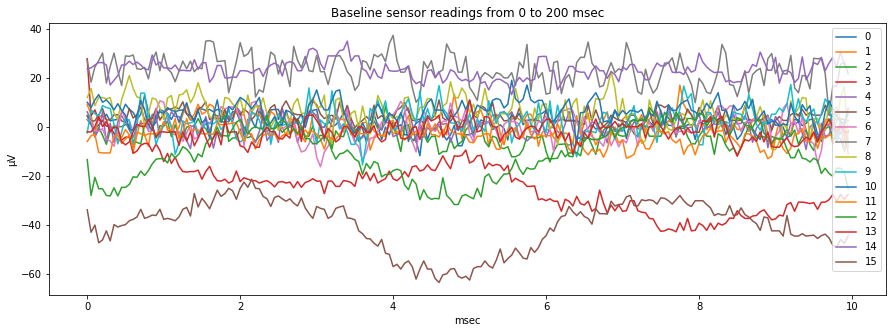

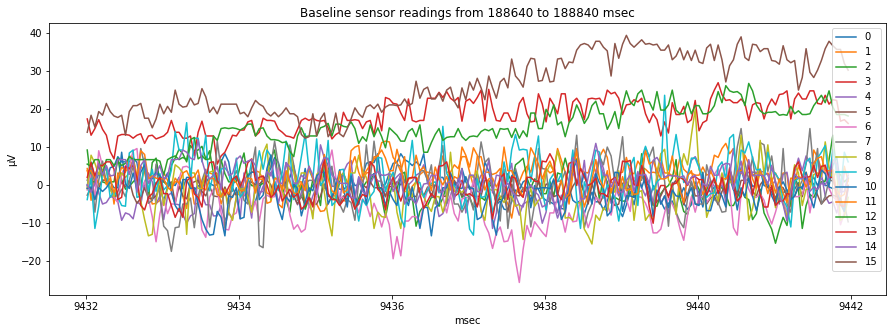

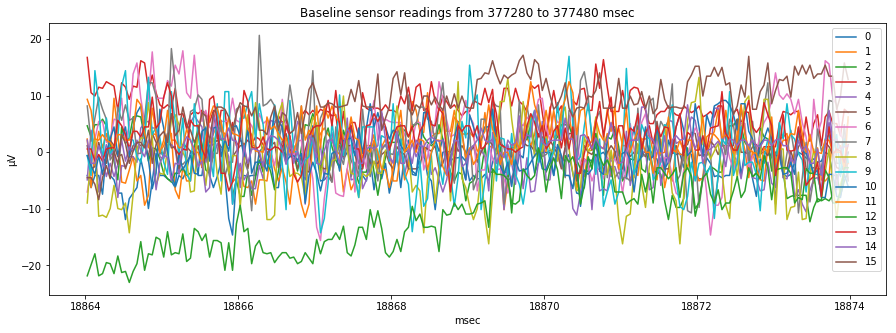

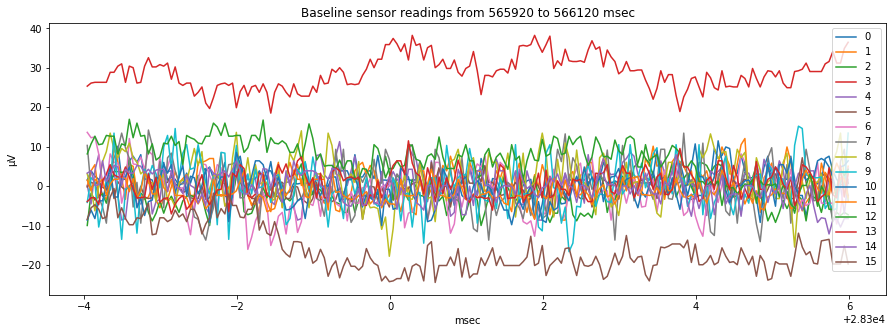

In [4]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)
for j in range(4):
    start = j * (S.shape[1] // 4)
    end = start + int(fs) // 100
    for i in range(S.shape[0]):
        plt.plot(t[start:end], S[i][start:end], label=str(i))
    plt.legend(loc='upper right')
    plt.title("Baseline sensor readings from {} to {} msec".format(start, end))
    plt.xlabel("msec")
    plt.ylabel("μV")
    plt.show()

4 of the pads were 'not touching' - possibly red, green and brown?

Let's look at the frequency spectrum...

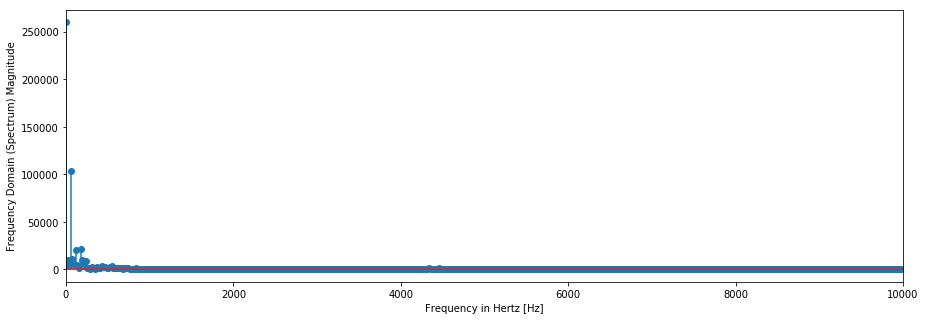

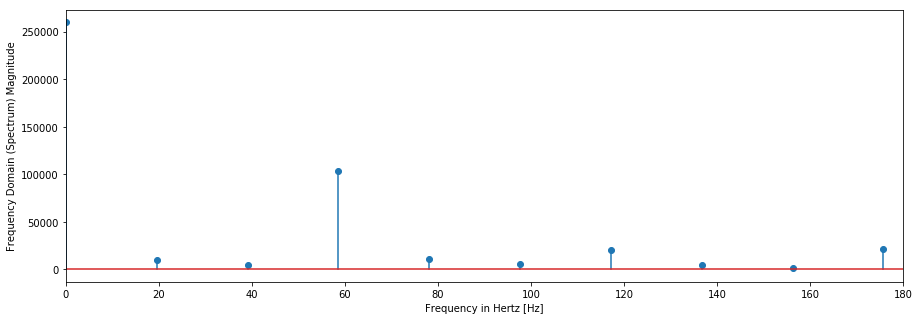

In [16]:
fft = scipy.fftpack.fft(S[0][0:1024])
freqs = scipy.fftpack.fftfreq(len(S[0][0:1024])) * fs

plt.stem(freqs, np.abs(fft))
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
plt.xlim(0, fs / 2)
plt.show()

plt.stem(freqs, np.abs(fft))
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
plt.xlim(0, 180)
plt.show()

Lets look at the spectrum of the baseline with a 100Hz high pass filter

In [6]:
S, t, fs, metadata = load_experiment("organoid-1/recording_2_100Hz-high-pass_181208_122907")
print("Loaded signal comprising {} channels {} samples each covering {} seconds".format(*S.shape, t[-1] // 1000))
print("Original file: {}".format(metadata["source_file_path"]))

Loaded signal comprising 17 channels 1200240 samples each covering 60.0 seconds
Original file: mea/ucsf/11-12-2018/organoid 1/recording_2_100Hz high pass_181208_122907.rhd


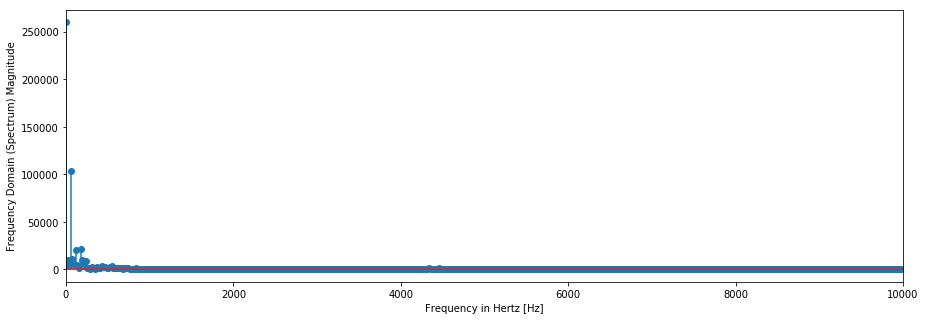

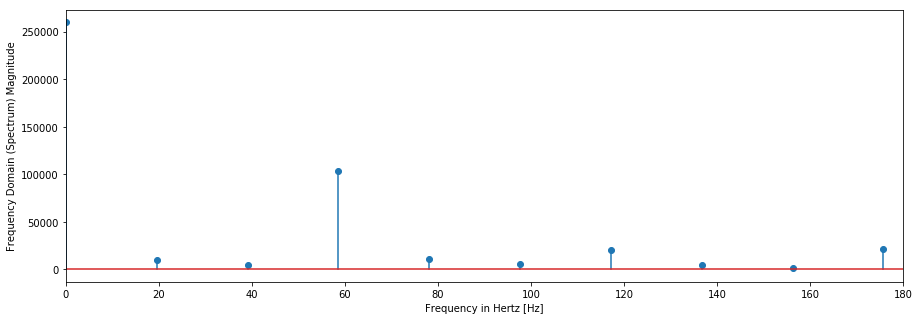

In [17]:
fft = scipy.fftpack.fft(S[0][0:1024])
freqs = scipy.fftpack.fftfreq(len(S[0][0:1024])) * fs

plt.stem(freqs, np.abs(fft))
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
plt.xlim(0, fs / 2)
plt.show()

plt.stem(freqs, np.abs(fft))
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
plt.xlim(0, 180)
plt.show()

In [8]:
print("frequency_parameters from metadata:")
metadata["frequency_parameters"]

frequency_parameters from metadata:


{'actual_dsp_cutoff_frequency': 0.7772186398506165,
 'actual_impedance_test_frequency': 1000.0,
 'actual_lower_bandwidth': 0.09452909976243973,
 'actual_upper_bandwidth': 7603.76513671875,
 'amplifier_sample_rate': 20000.0,
 'aux_input_sample_rate': 5000.0,
 'board_adc_sample_rate': 20000.0,
 'board_dig_in_sample_rate': 20000.0,
 'desired_dsp_cutoff_frequency': 1.0,
 'desired_impedance_test_frequency': 1000.0,
 'desired_lower_bandwidth': 0.10000000149011612,
 'desired_upper_bandwidth': 7500.0,
 'dsp_enabled': 1,
 'notch_filter_frequency': 0,
 'supply_voltage_sample_rate': 333.3333333333333}

Hard to tell the high pass filter is working. From the metadata doesn't appear to be on vs the first signal.

# KCl

Let's look at the experiments where KCl was added to the organoid half way through the recording.

In [9]:
S, t, fs, metadata = load_experiment("organoid-4/recording_4_wt-40mM-KCl_181208_143057")
print("Loaded signal comprising {} channels {} samples each covering {} seconds".format(*S.shape, t[-1] // 1000))
print("Original file: {}".format(metadata["source_file_path"]))

Loaded signal comprising 16 channels 1200240 samples each covering 60.0 seconds
Original file: mea/ucsf/11-12-2018/organoid 4/recording_4_wt 40mM KCl_181208_143057.rhd


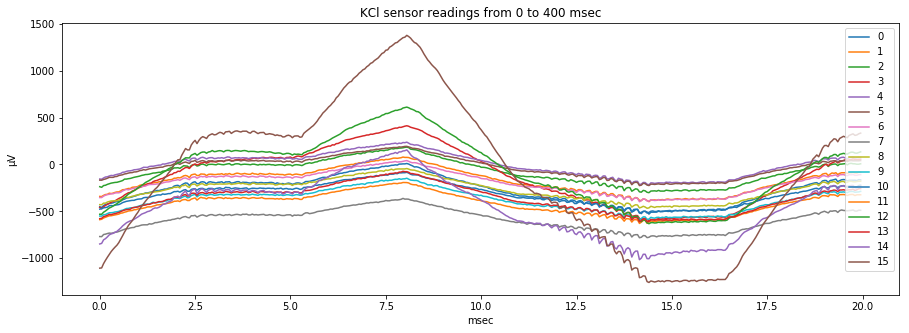

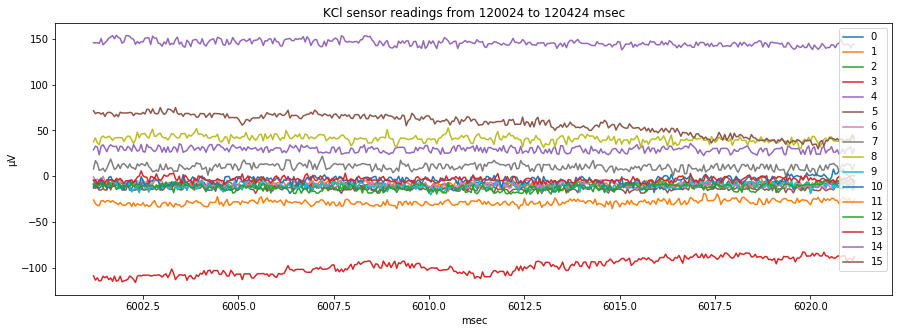

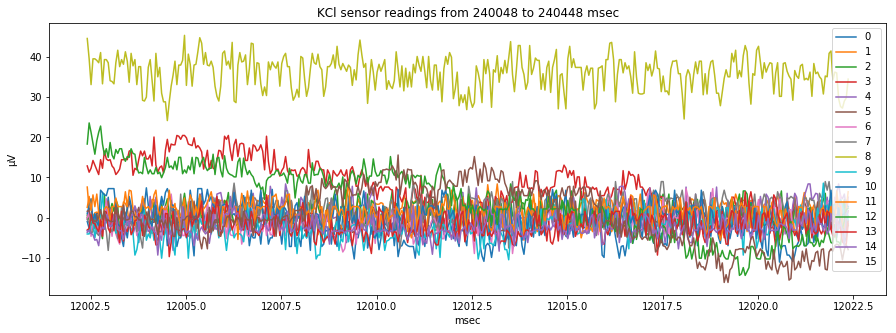

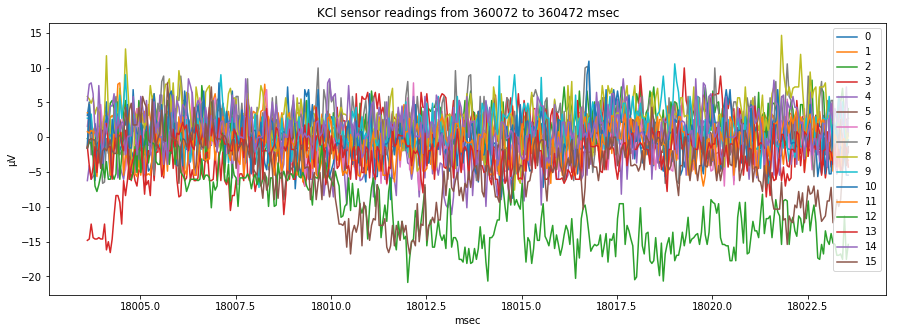

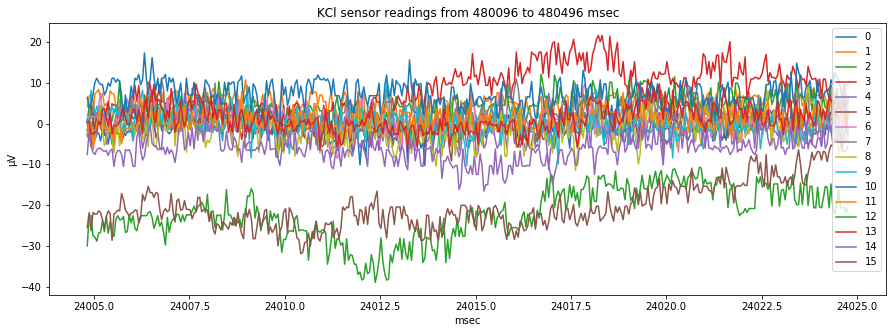

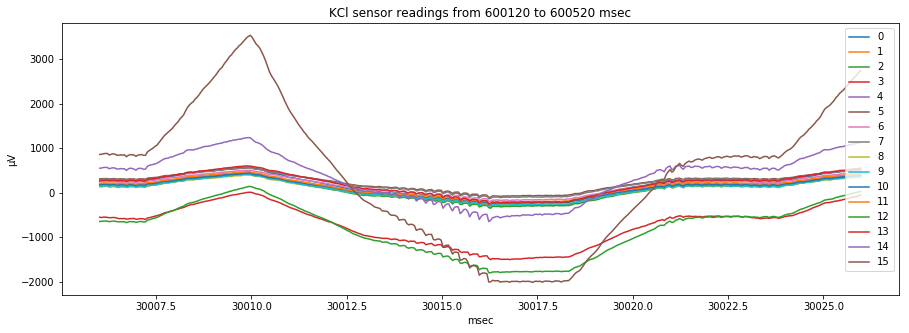

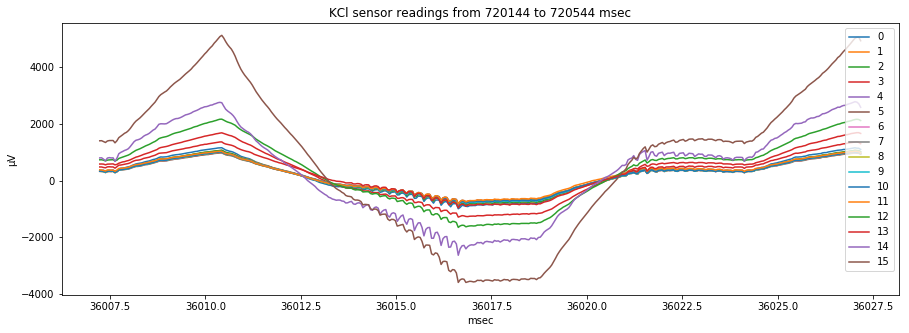

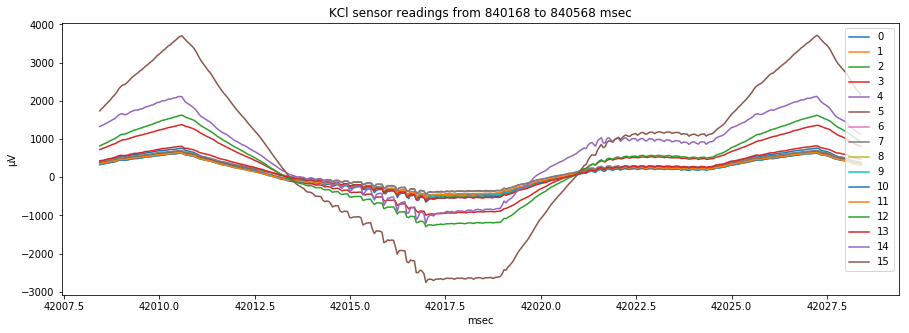

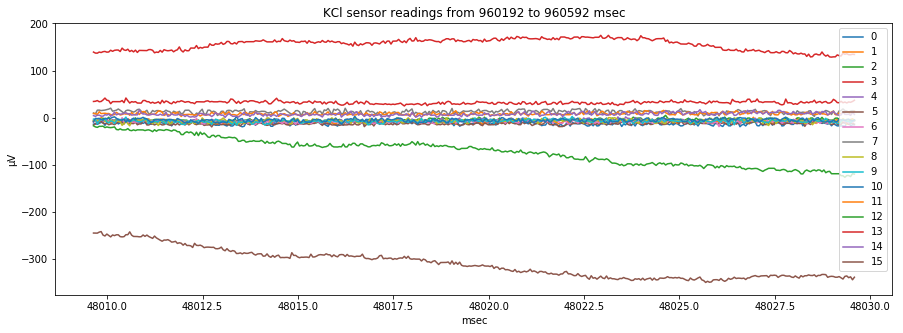

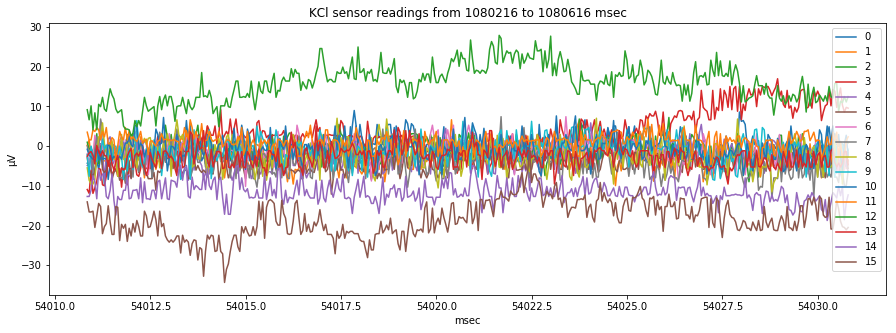

In [19]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)
for j in range(10):
    start = j * (S.shape[1] // 10)
    end = start + int(fs) // 50
    for i in range(S.shape[0]):
        plt.plot(t[start:end], S[i][start:end], label=str(i))
    plt.legend(loc='upper right')
    plt.title("KCl sensor readings from {} to {} msec".format(start, end))
    plt.xlabel("msec")
    plt.ylabel("μV")
    plt.show()